### pmdarima
Notebook that I used to learn pmdarima, in order to create models with auto arima

https://github.com/alkaline-ml/pmdarima/  
http://alkaline-ml.com/pmdarima/

In [1]:
import numpy as np
import pmdarima as pm

In [2]:
from pmdarima.datasets import load_wineind

# this is a dataset from R
wineind = load_wineind().astype(np.float64)

### Fitting an ARIMA
Fitting ARIMA without auto_arima. This is not needed if parameters is already known

In [3]:
from pmdarima.arima import ARIMA

fit = ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(y=wineind)

In [4]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1528.380
Date:                            Sat, 20 Feb 2021   AIC                           3066.760
Time:                                    21:21:38   BIC                           3082.229
Sample:                                         0   HQIC                          3073.041
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -47.4870     41.731     -1.138      0.255    -129.278      34.304
ar.L1          0.1405      0.079      1.778      0.075      -0.014       0.295
ma.L1         -0.7359      0.082     -8.940      0.000      -0.897      -0.575
ma.S.L12      -0.3916      0.058     -6.710      0.000      -0.506      -0.277
sigma2      8.405e+06   8.52e+05      9.870      0.000    6.74e+06    1.01e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.84   Jarque-Bera (JB):                19.26
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.56
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Now using auto_arima

In [5]:
stepwise_fit = pm.auto_arima(wineind, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3066.492, Time=0.98 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3131.408, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3097.884, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3066.329, Time=0.44 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3089.456, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3067.457, Time=0.66 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3067.481, Time=1.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3071.631, Time=0.42 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=6.56 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3117.921, Time=0.68 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3065.533, Time=0.48 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=3087.883, Time=0.15 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=3066.239, Time=0.93 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=3066.373, Time=1.71 sec
 ARIMA(0,1,2)(1,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  176
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1528.766
Date:                              Sat, 20 Feb 2021   AIC                           3065.533
Time:                                      21:22:04   BIC                           3077.908
Sample:                                           0   HQIC                          3070.557
                                              - 176                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5756      0.041    -13.952      0.000      -0.656      -0.495
ma.L2         -0.1065      0.048     -2.224      0.026      -0.200      -0.013
ma.S.L12      -0.3848      0.054     -7.156      0.000      -0.490      -0.279
sigma2      7.866e+06   7.01e+05     11.228      0.000    6.49e+06    9.24e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.84   Jarque-Bera (JB):                18.05
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.55
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### auto_arima without seasonality

In [6]:
no_seasonality_fit = pm.auto_arima(wineind, start_p=0, start_q=0, max_p=3, max_q=3,
                             seasonal=False, start_d=0, max_d=3, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

no_seasonality_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3587.776, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3573.940, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3509.903, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3585.787, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3508.854, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3500.610, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3540.400, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3502.598, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3503.442, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3505.621, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3516.118, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3504.888, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3500.251, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3509.015, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  176
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1746.125
Date:                Sat, 20 Feb 2021   AIC                           3500.251
Time:                        21:22:07   BIC                           3512.910
Sample:                             0   HQIC                          3505.386
                                - 176                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1420      0.109      1.307      0.191      -0.071       0.355
ar.L2         -0.2572      0.125     -2.063      0.039      -0.502      -0.013
ma.L1         -0.9074      0.052    -17.526      0.000      -1.009      -0.806
sigma2      2.912e+07   1.19e-09   2.44e+16      0.000    2.91e+07    2.91e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.92   Prob(JB):                         0.79
Heteroskedasticity (H):               1.37   Skew:                            -0.12
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.35e+32. Standard errors may be unstable.
"""

In [7]:
no_seasonality_fit.predict(5)

array([24617.39764572, 26417.98870268, 26349.203906  , 25876.29760317,
       25826.84212846])

In [8]:
stepwise_fit.predict(5)

array([21833.71615197, 26239.84853716, 30813.8473837 , 35970.36202751,
       13683.27930429])

In [9]:
fit.predict(5)

array([21664.18098989, 25794.10243987, 30348.85616371, 35435.63326266,
       13079.33979844])

### Another simpler approach

In [10]:
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

train, test = train_test_split(wineind, train_size=150)

In [11]:
model = pm.auto_arima(train, seasonal=True, m=12)

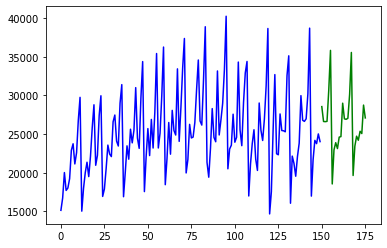

In [12]:
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(wineind.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()